In [581]:
import numpy as np
import matplotlib.pyplot as plt

In [582]:
def generate_d_vector(dim):
    return np.random.standard_normal(size=dim)

In [583]:
def generate_dxd_matrix(dim):
    toret = []
    for i in range(dim):
        toret.append(np.random.standard_normal(size = dim))
    return toret

In [584]:
def generate_Q(dim):
    A = generate_dxd_matrix(dim)
    At = np.transpose(A)
    return np.matmul(At,A)

In [585]:
def compute_f(Q,x,c):
    xtQx = np.dot(0.5,np.matmul(np.transpose(x),np.matmul(Q,x)))
    xtc = np.matmul(np.transpose(x),c)
    return(np.subtract(xtQx,xtc))

In [586]:
def minimizer(Q,c):
    return np.matmul(np.linalg.inv(Q),c)

In [587]:
def compute_gd(Q,x,c):
    Qx = np.matmul(Q,x)
    return(np.subtract(Qx,c))

In [588]:
def compute_newx(x,alpha,gd):
    return x + np.dot(alpha,gd)

In [589]:
def n_orthogonal_vectors(Q,x,c):
    f=[]
    e=[]
    angl=[]
    x_min = minimizer(Q,c)
    print(x_min)
    d = np.dot(-1,compute_gd(Q,x,c))
    g = compute_gd(Q,x,c)
    alpha = np.dot(d,d)/np.dot(np.dot(d,Q),d)
    for i in range(len(c)):
        last = x
        alpha = np.dot(np.dot(-1,g),d)/np.dot(np.dot(d,Q),d)
        # print(x)
        x = compute_newx(x,alpha,d)
        f.append(compute_f(Q,x,c))
        temp = np.linalg.norm(x_min - x)
        e.append(temp)
        angl.append((np.matmul(np.transpose(x - last),x_min - last))/((np.linalg.norm(x - last))*temp))
        g = compute_gd(Q,x,c)
        beta = np.dot(np.dot(g,Q),d)/np.dot(np.dot(d,Q),d)
        d = np.dot(-1,np.subtract(g,np.dot(beta,d)))
    print(x)
    return f,e,angl
        
        
        

In [590]:
def plot_graphs(f,e,angl):
    plt.title("Convergence of function F to minimum")
    plt.plot(f)
    plt.show()
    
    plt.title("Convergence of error E approaching the minimum")
    plt.plot(e)
    plt.show()
    
    plt.title("Convergence of error E log scale approaching the minimum")
    plt.plot(e)
    plt.yscale("log")
    plt.show()
    
    plt.title("Cosine during approach")
    plt.plot(angl)
    plt.show()

In [591]:
c = generate_d_vector(10)
x = generate_d_vector(10)
Q = generate_Q(10)

[ -8.00966106  -5.15842125  -4.2344767   17.0402557    2.11184616
  -8.2016262    1.26334567 -19.2086879    3.18641561   8.36893981]
[ -8.00966161  -5.1584213   -4.23447721  17.04025492   2.11184604
  -8.20162775   1.26334593 -19.20868764   3.18641553   8.36893967]


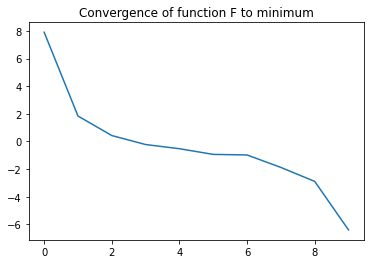

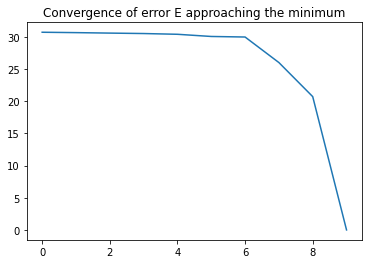

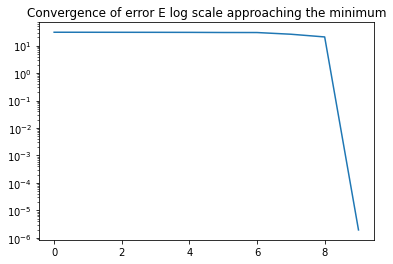

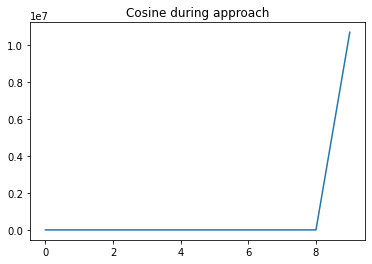

In [592]:
f,e,angl = n_orthogonal_vectors(Q,x,c)
plot_graphs(f,e,angl)